# Neural Network
* Fully-connected layer
* 선형 회귀(Linear Regression)를 돌려볼 것
* tensorflow, keras를 주로 많이 사용

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf # colab에 설치가 되어 있음
import keras

time: 760 µs (started: 2024-06-28 03:23:53 +00:00)


In [20]:
print(tf.__version__)
print(keras.__version__)

2.15.0
2.15.0
time: 1.91 ms (started: 2024-06-28 03:23:54 +00:00)


In [21]:
# 라이브러리 설치 - 시간 체크를 위해서
#!pip install ipython-autotime

time: 346 µs (started: 2024-06-28 03:23:54 +00:00)


In [22]:
# 확장 기능 로딩
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.15 ms (started: 2024-06-28 03:23:54 +00:00)


## 1. 데이터 준비

In [23]:
# Linear Regression이 제대로 동작하는지 확인하기 위해 단순하게 생성
X_train = np.array([1, 2, 3, 4, 5, 6])
y_train = np.array([9, 12, 15, 18, 21, 24])

time: 728 µs (started: 2024-06-28 03:23:54 +00:00)


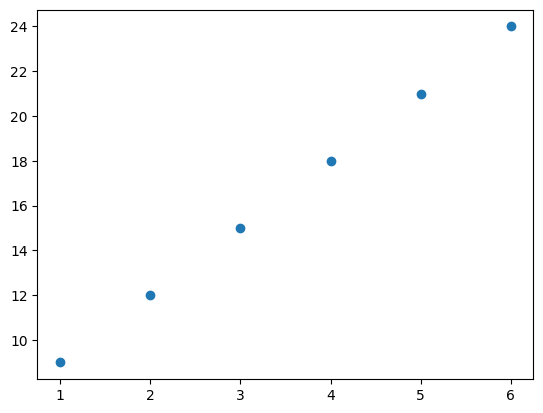

time: 698 ms (started: 2024-06-28 03:23:54 +00:00)


In [24]:
# 데이터 출력
plt.scatter(X_train, y_train)
plt.show()

### Linear Regression

In [25]:
# 라이브러리는 데이터를 2차원으로 집어넣어야 함
# X_train값 shape이 1차원 -> 이를 2차원으로 변경
X_train = X_train.reshape(-1, 1)
print(X_train, X_train.shape)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]] (6, 1)
time: 4.5 ms (started: 2024-06-28 03:23:55 +00:00)


In [26]:
# sklearn에 있는 Linear Regression을 돌려보기
# 최소제곱법으로 Linear Regression을 돌림 -> 수학적으로 계산 가능
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

time: 9.66 ms (started: 2024-06-28 03:23:55 +00:00)


In [27]:
# a = 3, y절편 = 약 6 -> y = 3x + 6
lr.coef_, lr.intercept_

(array([3.]), 5.999999999999998)

time: 4.4 ms (started: 2024-06-28 03:23:55 +00:00)


In [38]:
# 예측값
y_pred_s = lr.predict([[10]])

time: 11.3 ms (started: 2024-06-28 03:26:02 +00:00)


## NN 모델

In [29]:
# keras로 모델 생성
# 자주쓰는 layer의 종류가 쭉 들어있음
# layer를 쌓아서 모델을 생성함
from keras import layers
# X_train을 2차원으로 변경해서 1개씩 들어옴(x 하나 값) -> 따라서 input shape이 1임
# layer, units이 하나인 모델
model = keras.Sequential([
    layers.Dense(units=1,input_shape=(1,)) # 1차원 튜플
])

time: 49.3 ms (started: 2024-06-28 03:23:55 +00:00)


In [30]:
# 모델 확인 - parameter가 2개
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 33.7 ms (started: 2024-06-28 03:23:55 +00:00)


In [31]:
# 학습 - 손실함수를 정해야 함(선형 회귀이므로 mse)
model.compile(
    loss='mse',
    optimizer='Adam', # 경사하강법
    metrics=['mse'] # 어떤 값을 기준으로 판단 - mse
    )

time: 27.6 ms (started: 2024-06-28 03:23:55 +00:00)


In [32]:
# fit하면 학습이 됨
# mse가 0인 것이 좋음
# 파라미터 변경하면 모델 학습부터 다시 진행
model.fit(
    X_train, y_train,
    epochs=100, # 몇 번 반복해서 학습을 시킬건지,
    batch_size=len(X_train) # 한번 학습할 때, 몇 개씩 학습을 시킬건지
)

Epoch 1/100
1/1 [==============================] - 1s 608ms/step - loss: 230.9937 - mse: 230.9937
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 230.8479 - mse: 230.8479
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 230.7022 - mse: 230.7022
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 230.5565 - mse: 230.5565
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 230.4109 - mse: 230.4109
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 230.2653 - mse: 230.2653
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 230.1197 - mse: 230.1197
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 229.9742 - mse: 229.9742
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 229.8288 - mse: 229.8288
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 229.6835 - mse: 229.6835
Epoch 11/100
1/1 [==========

time: 2.66 s (started: 2024-06-28 03:23:55 +00:00)


In [33]:
# a, b값을 보겠다는 것
model.get_weights()

[array([[0.64038676]], dtype=float32), array([0.09947369], dtype=float32)]

time: 11.5 ms (started: 2024-06-28 03:23:57 +00:00)


In [42]:
# 학습 예측
y_pred = model.predict([[1], [5], [10]])
y_pred

1/1 [==============================] - 0s 77ms/step


array([[0.7398604],
       [3.3014076],
       [6.503341 ]], dtype=float32)

time: 402 ms (started: 2024-06-28 03:27:07 +00:00)


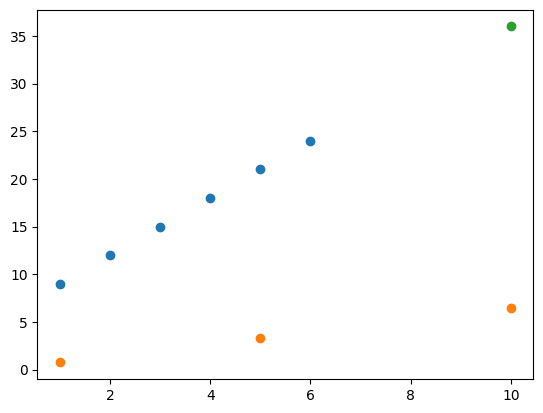

time: 232 ms (started: 2024-06-28 04:23:42 +00:00)


In [45]:
plt.scatter(X_train, y_train)
plt.scatter([[1], [5], [10]], y_pred) # keras(red)
plt.scatter([[10]], y_pred_s) # sklearn(green)
plt.show()